## 주파수 변환

참고: https://datascienceschool.net/03%20machine%20learning/03.03.02%20%ED%91%B8%EB%A6%AC%EC%97%90%20%EB%B3%80%ED%99%98%EA%B3%BC%20%EC%8A%A4%ED%8E%99%ED%8A%B8%EB%9F%BC.html

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-09-주파수_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-09-주파수_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

## 복소 지수함수

오일러 공식에 의해 지수부가 허수(imaginary number)인 복소 지수함수(complex exponential function)는 코사인 함수인 실수부와 사인 함수인 허수부의 합으로 나타난다. 

$$ \exp(i\cdot x) = \cos x + i\sin x $$

다음은 주기가 $T$, 주파수가 $\frac{2\pi}{T}$인 복수 지수함수로서 주기가 $T$인 사인과 코사인의 조합이 된다.

$$ \exp \left( i\cdot 2\pi\frac{1}{T} t \right) = \cos \left(2\pi \dfrac{1}{T} t \right) +i\sin \left(2\pi \dfrac{1}{T} t \right) $$

따라서 주기가 $\frac{T}{n}$, 주파수가 $n\frac{2\pi}{T}$인 복수 지수함수는 다음과 같다.

$$ \exp \left( i\cdot 2\pi\frac{n}{T} t \right) = \cos \left(2\pi \dfrac{n}{T} t \right) +i\sin \left(2\pi \dfrac{n}{T} t \right) $$

## 푸리에 변환

주기 $T$를 가지고 반복되는(cyclic) 모든 함수 $y(t)$는 주파수와 진폭이 다른 몇 개의 사인 함수(정확히는 복수 지수함수)의 합으로 나타낼 수 있다. 이 사인 함수의 진폭을 구하는 과정을 푸리에 변환(Fourier Transform)이라고 한다.

$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$

이 식에서 $k$번째 사인 함수의 진폭 $A_n$은 다음 식으로 계산한다. 이것이 푸리에 변환이다.

$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} y(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$

## 이산 푸리에 변환

이산 푸리에 변환(Discrete Fourier Transform) 또는 DFT는 길이가 $N$인 이산시간 시계열 데이터 

$$ y_0, y_1, \ldots, y_{N-1} $$

이 있을 때 이 이산시간 시계열이 주기 $N$으로 계속 반복된다고 가정하여 푸리에 변환을 한 것이다.

이 때 원래의 이산시간 시계열 데이터는 다음 주파수와 진폭이 다른 $N$개의 사인 함수의 합으로 나타난다.

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

이 때 진폭 $Y_k$를 원래의 시계열 데이터에 대한 푸리에 변환값이라고 한다.

$$
Y_k = \sum_{n=0}^{N-1} y_n \cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$

## 고속 퓨리에 변환

고속 퓨리에 변환(Fast Fourier Transform, FFT)는 아주 적은 계산량으로 DFT를 하는 알고리즘을 말한다. 길이가 $2^N$인 시계열에만 적용할 수 있다는 단점이 있지만 보통의 DFT가 $O(N^2)$ 수준의 계산량을 요구하는데 반해 FFT는 $O(N\log_2 N)$ 계산량으로 DFT를 구할 수 있다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import fftpack

N = 1024
T = 1.0 / 44100.0

def plot_wav_fft(wav_name, X, sample_rate=44100, desc=None, trans=False):
    plt.clf()
    plt.figure(num=None, figsize=(6, 4))
    spectrum = fftpack.fft(X, N)
    freq = fftpack.fftfreq(len(X), d=1.0 / sample_rate)

    plt.subplot(211)
    num_samples = 1024
    plt.xlim(0, num_samples / sample_rate)
    plt.xlabel("time [s]")
    plt.title(desc or wav_name)
    plt.plot(np.arange(num_samples) / sample_rate, X[:num_samples])
    plt.grid(True)

    if trans:
        plt.subplot(212)
        plt.xlim(0, 3000)
        plt.xlabel("frequency [Hz]")
        #plt.xticks(np.arange(5) * 3000)
        if desc:
            desc = desc.strip()
            fft_desc = desc[0].lower() + desc[1:]
        else:
            fft_desc = wav_name
        plt.title("FFT of %s" % fft_desc)
        xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
        plt.stem(xf, 2.0/N * np.abs(spectrum[0:N//2]))
        #plt.plot(freq, abs(spectrum), linewidth=2)
        plt.grid(True)
        plt.tight_layout()

    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 432x288 with 0 Axes>

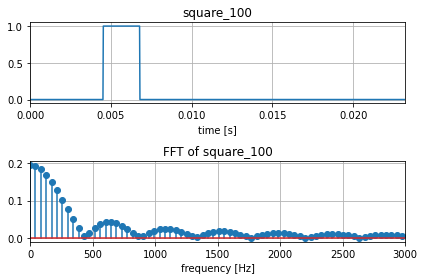

In [3]:
y1 = np.zeros(N)
for x in range(200,300):
    y1[x] = 1.0 

plot_wav_fft("square_100", y1, trans=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 432x288 with 0 Axes>

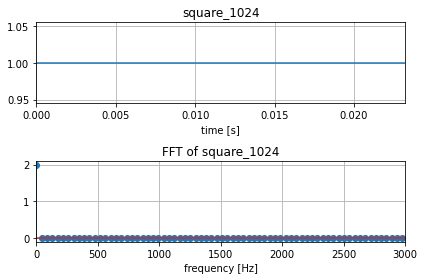

In [4]:
y2 = np.ones(N)

plot_wav_fft("square_1024", y2, trans=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 432x288 with 0 Axes>

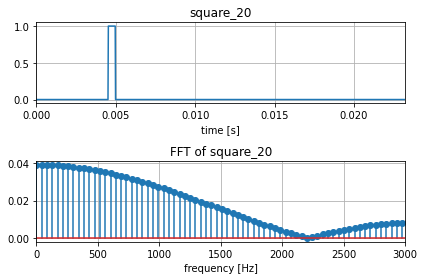

In [5]:
y3 = np.zeros(N)
for x in range(200,220):
    y3[x] = 1.0 

plot_wav_fft("square_20", y3, trans=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 432x288 with 0 Axes>

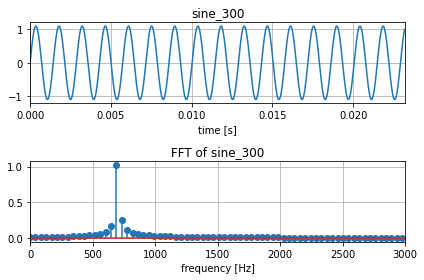

In [6]:
f1 = 697
t = np.linspace(0.0, N*T, N)
y4 = 1.1 * np.sin(2 * np.pi * f1 * t)
plot_wav_fft("sine_300", y4, trans=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 432x288 with 0 Axes>

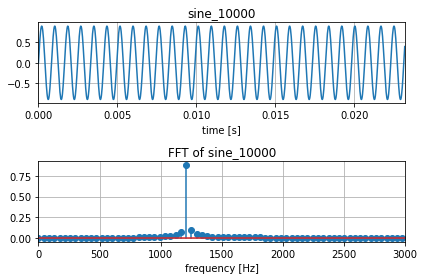

In [7]:
f2 = 1209
t = np.linspace(0.0, N*T, N)
y5 = 0.9 * np.sin(2 * np.pi * f2 * t)
plot_wav_fft("sine_10000", y5, trans=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 432x288 with 0 Axes>

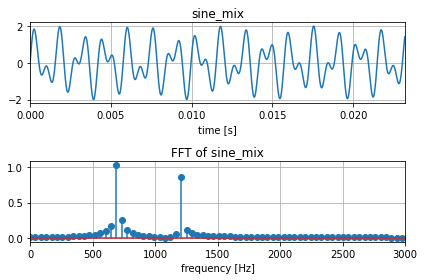

In [8]:
y6 = y4 + y5
plot_wav_fft("sine_mix", y6, trans=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improve

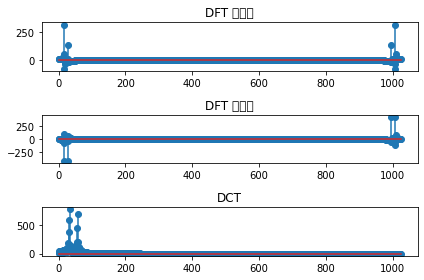

In [11]:
from scipy.fftpack import fft, dct

yf = fft(y6, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

dct_type = 2
yf2 = dct(y6, dct_type, N)

plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT 실수부")

plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT 허수부")

plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCT")

plt.tight_layout()
plt.show()